# ADS5004 데이터분석언어 기말프로젝트
----
# 프로젝트 제목 : 서울의 미세먼지

- ### 미세먼지의 발생 원인 판단 
- ### 정부의 미세먼지 대책 성공여부 판단
- ### 서울 하루 평균 미세먼지 농도 예측


# 1. 라이브러리/데이터셋 로드

## 1.1 라이브러리 로드/설치

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
import glob

import warnings
warnings.filterwarnings("ignore")

# 한글깨짐 현상으로 인해 폰트변경
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [2]:
# folium 설치 
# pip install folium

## 1.2 데이터셋로드

In [19]:
# 데이터가 저장된 경로지정
path = 'DATASET/'

In [20]:
# 대기오염정보 데이터 2010~2020년 불러오고 df_airpol에 저장

airpol = {}
df_airpol = pd.DataFrame()
for idx, f in enumerate(glob.iglob(path+'대기오염정보2011_2020/*.csv'), 1):
    airpol[idx] = pd.read_csv(f, low_memory=False)
    df_airpol = pd.concat([df_airpol,airpol[idx]])

In [5]:
# 강수 데이터불러오기
rain = {}
for idx, f in enumerate(glob.iglob(path+'강수2011_2020/*.csv'), 1):
    rain[idx] = pd.read_csv(f, low_memory=False)

# 강수형태 데이터불러오기
rainStr = {}
for idx, f in enumerate(glob.iglob(path+'강수형태2011_2020/*.csv'), 1):
    rainStr[idx] = pd.read_csv(f, low_memory=False)

# 기온 데이터불러오기
temp = {}
for idx, f in enumerate(glob.iglob(path+'기온2011_2020/*.csv'), 1):
    temp[idx] = pd.read_csv(f, low_memory=False)

# 습도 데이터불러오기
humidity = {}
for idx, f in enumerate(glob.iglob(path+'습도2011_2020/*.csv'), 1):
    humidity[idx] = pd.read_csv(f, low_memory=False)
    
# 풍속 데이터불러오기
windSpd = {}
for idx, f in enumerate(glob.iglob(path+'풍속2011_2020/*.csv'), 1):
    windSpd[idx] = pd.read_csv(f, low_memory=False)

# 풍향 데이터불러오기
windDir = {}
for idx, f in enumerate(glob.iglob(path+'풍향2011_2020/*.csv'), 1):
    windDir[idx] = pd.read_csv(f, low_memory=False)

# 하늘상태 데이터불러오기
skyCond = {}
for idx, f in enumerate(glob.iglob(path+'하늘상태2011_2020/*.csv'), 1):
    skyCond[idx] = pd.read_csv(f, low_memory=False)

# 데이터전처리

## 대기오염정보 전처리

In [6]:
# 데이터 확인
df_airpol.head(5)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20110101,강남구,0.052,0.004,0.7,0.007,66.0,NaN
1,20110101,강남대로,0.075,0.003,1.4,0.008,70.0,NaN
2,20110101,강동구,0.036,0.007,0.9,0.007,56.0,NaN
3,20110101,강변북로,0.050,0.005,0.9,0.006,67.0,NaN
4,20110101,강북구,0.043,0.006,0.9,0.007,50.0,NaN


In [7]:
# 데이터타입과 NULL 유무 확인
df_airpol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148855 entries, 0 to 18173
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   측정일시          148855 non-null  int64  
 1   측정소명          148855 non-null  object 
 2   이산화질소농도(ppm)  147175 non-null  float64
 3   오존농도(ppm)     147217 non-null  float64
 4   이산화탄소농도(ppm)  147087 non-null  float64
 5   아황산가스(ppm)    147206 non-null  float64
 6   미세먼지(㎍/㎥)     146778 non-null  float64
 7   초미세먼지(㎍/㎥)    115347 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.2+ MB


In [8]:
# 초미세먼지 콜롬의 경우 NULL 값이 너무 많음으로 콜롬제거 
df_airpol = df_airpol.iloc[:,:-1]
df_airpol.head(2)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥)
0,20110101,강남구,0.052,0.004,0.7,0.007,66.0
1,20110101,강남대로,0.075,0.003,1.4,0.008,70.0


In [9]:
# 그외 NULL 값에 대에서는 평균값 적용
df_airpol.fillna(df_airpol.mean(),inplace=True)

# NULL 값 제거 확인
df_airpol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148855 entries, 0 to 18173
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   측정일시          148855 non-null  int64  
 1   측정소명          148855 non-null  object 
 2   이산화질소농도(ppm)  148855 non-null  float64
 3   오존농도(ppm)     148855 non-null  float64
 4   이산화탄소농도(ppm)  148855 non-null  float64
 5   아황산가스(ppm)    148855 non-null  float64
 6   미세먼지(㎍/㎥)     148855 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.1+ MB


In [10]:
# 데이터 정보 확인
df_airpol.describe()

,측정일시,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥)
count,1.488550e+05,148855.000000,148855.000000,148855.000000,148855.000000,148855.000000
mean,2.015696e+07,0.035402,0.020565,0.568495,0.004902,45.229707
std,2.943544e+04,0.023528,0.012323,0.252207,0.002047,27.102958
min,2.011010e+07,0.000000,0.000000,0.000000,0.000000,3.000000
25%,2.013072e+07,0.023000,0.011000,0.400000,0.003000,28.000000
50%,2.016022e+07,0.033000,0.019000,0.500000,0.005000,41.000000
75%,2.018112e+07,0.046000,0.028000,0.700000,0.006000,56.000000
max,2.020123e+07,6.523000,0.278000,25.100000,0.148000,709.000000


## 서울시 구별 미세먼지농도 시각화

In [147]:
df_seoulgu = df_airpol.groupby('측정소명').mean()
df_seoulgu = df_seoulgu['미세먼지(㎍/㎥)']
for i in df_seoulgu.index:
    if i[-1] != '구':
        df_seoulgu.drop(i,axis=0,inplace=True)
    
df_seoulgu = df_seoulgu.sort_values(ascending=False)
df_seoulgu = df_seoulgu.reset_index()
df_seoulgu.tail(10)

,측정소명,미세먼지(㎍/㎥)
15,서대문구,42.408244
16,동작구,42.363149
17,종로구,42.179933
18,송파구,42.067469
19,금천구,41.716737
20,중구,41.552720
21,노원구,41.315359
22,강북구,41.159033
23,도봉구,41.150949
24,용산구,40.584197


In [54]:
# FOLIUM을 통한 서울시 구별 미세먼지농도 시각화 
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='OpenStreetMap')

map.choropleth(
    geo_data=state_geo,
    name='미세먼지(㎍/㎥)',
    data=df_seoulgu,
    columns=['측정소명', '미세먼지(㎍/㎥)'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = '미세먼지(㎍/㎥)'
)

map

In [13]:
# 중구인곳만 추출
# 기상관측 데이터는 중구에서 측정되었음으로 
airpol_junggu = df_airpol[df_airpol['측정소명']=='중구']

# 측정일시의 날짜값이 현재 사용중인 데이터프레임의 날짜값과 형식이 다름으로 형식을 맞춰줌
for i in range(len(airpol_junggu)):
    x = airpol_junggu['측정일시']
    airpol_junggu['측정일시'].iloc[i] = str(x.iloc[i])[:4]+'-'+str(x.iloc[i])[4:6]+'-'+str(x.iloc[i])[6:]
airpol_junggu.reset_index(inplace=True,drop=True)
airpol_junggu.head(2)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥)
0,2011-01-01,중구,0.026,0.009,1.0,0.008,57.0
1,2011-01-02,중구,0.031,0.011,1.2,0.006,62.0


In [14]:
# 데이터프레임에 미세먼지 등급 추가시키기
airpol_junggu['등급'] = airpol_junggu['측정소명']

for i in range(0,len(airpol_junggu)):
    if airpol_junggu['미세먼지(㎍/㎥)'][i] <= 30 :
        airpol_junggu['등급'][i] = '좋음'
    elif airpol_junggu['미세먼지(㎍/㎥)'][i] > 150 :
        airpol_junggu['등급'][i] = '아주나쁨'
    elif airpol_junggu['미세먼지(㎍/㎥)'][i] > 30 and airpol_junggu['미세먼지(㎍/㎥)'][i] <= 80:
        airpol_junggu['등급'][i] = '보통'
    elif airpol_junggu['미세먼지(㎍/㎥)'][i] > 80 and airpol_junggu['미세먼지(㎍/㎥)'][i] <= 150:
        airpol_junggu['등급'][i] = '나쁨'
        
airpol_junggu.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),등급
0,2011-01-01,중구,0.026,0.009,1.0,0.008,57.0,보통
1,2011-01-02,중구,0.031,0.011,1.2,0.006,62.0,보통
2,2011-01-03,중구,0.036,0.005,1.2,0.005,63.0,보통
3,2011-01-04,중구,0.027,0.010,0.8,0.006,55.0,보통
4,2011-01-05,중구,0.018,0.017,0.5,0.007,39.0,보통


## 서울시 중구 미세먼지 농도 등급별 파이차트 시각화

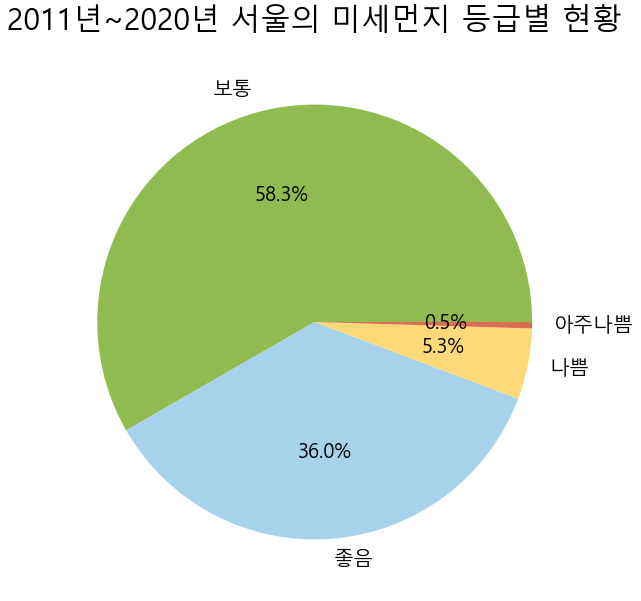

In [15]:
# 그래프 사이즈설정
plt.figure(figsize=(20, 10)) 

# Create a set of colors
colors = ['#90bb50', '#a6d2eb', '#ffd978', '#dc6c54']

# create data: an array of values
names= airpol_junggu.groupby('등급').count().sort_values('측정소명', ascending = False).index
size_of_groups= airpol_junggu.groupby('등급').count().sort_values('측정소명', ascending = False)['측정소명']

# Create a pieplot
plt.pie(size_of_groups, labels=names,autopct='%1.1f%%', textprops={'fontsize': 20}, colors=colors)

# 그래프레이블링 
plt.title('2011년~2020년 서울의 미세먼지 등급별 현황',fontsize=30, pad=20) ## 타이틀 출력

# 그래프 화면에 출력
plt.show()

## 강수 데이터 전처리
- 날짜 순으로 정렬되어있지만 연도 / 달이 없음으로 추가시켜야함
- 하루 매시간 측정된 데이터 임으로, 평균을 구하여 하루 평균을 구함 

In [16]:
rain = {}
df_rain = pd.DataFrame()
for idx, f in enumerate(glob.iglob(path+'강수2011_2020/*.csv'), 1):
    rain[idx] = pd.read_csv(f, low_memory=False)
    rain[idx].columns = [['측정일시','시간','강수']]
    df_rain = pd.concat([df_rain,rain[idx]])
df_rain.dropna(inplace=True)

In [17]:
import datetime

dt = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2021, 1, 1)
step = datetime.timedelta(days=1)

date20 = []

while dt < end:
    date20.append(dt.strftime('%Y-%m-%d'))
    dt += step

df_rain = df_rain[['측정일시','강수']]

k = 0
for j in range(len(date20)):
    i = 0
    for i in range(24):
        df_rain.iloc[:,0].iloc[k] = date20[j]
        k += 1
        i += 1

df_rain.columns = ['측정일시','강수']
df_rain = df_rain.groupby(['측정일시']).mean()
df_rain

,강수
측정일시,
2011-01-01,0.000000
2011-01-02,0.000000
2011-01-03,0.000000
2011-01-04,0.000000
2011-01-05,0.000000
...,...
2020-12-27,0.054167
2020-12-28,0.000000
2020-12-29,0.008333


## 강수형태 데이터 전처리

In [18]:
tmp = {}
df_rainStr = pd.DataFrame()
for idx, f in enumerate(glob.iglob(path+'강수형태2011_2020/*.csv'), 1):
    tmp[idx] = pd.read_csv(f, low_memory=False)
    tmp[idx].columns = [['측정일시','시간','강수형태']]
    df_rainStr = pd.concat([df_rainStr,tmp[idx]])
df_rainStr.dropna(inplace=True)
df_rainStr = df_rainStr[['측정일시','강수형태']]

k = 0
for j in range(len(date20)):
    i = 0
    for i in range(24):
        df_rainStr.iloc[:,0].iloc[k] = date20[j]
        k += 1
        i += 1

df_rainStr.columns = ['측정일시','강수형태']
df_rainStr = df_rainStr.groupby(['측정일시']).mean()
df_rainStr

,강수형태
측정일시,
2011-01-01,0.000000
2011-01-02,0.000000
2011-01-03,0.000000
2011-01-04,0.000000
2011-01-05,0.000000
...,...
2020-12-27,0.041667
2020-12-28,0.000000
2020-12-29,0.125000


## 기온 데이터 전처리

In [19]:
tmp = {}
df_temp = pd.DataFrame()
for idx, f in enumerate(glob.iglob(path+'기온2011_2020/*.csv'), 1):
    tmp[idx] = pd.read_csv(f, low_memory=False)
    tmp[idx].columns = [['측정일시','시간','기온']]
    df_temp = pd.concat([df_temp,tmp[idx]])
df_temp.dropna(inplace=True)
df_temp = df_temp[['측정일시','기온']]

k = 0
for j in range(len(date20)):
    i = 0
    for i in range(24):
        df_temp.iloc[:,0].iloc[k] = date20[j]
        k += 1
        i += 1

df_temp.columns = ['측정일시','기온']
df_temp = df_temp.groupby(['측정일시']).mean()
df_temp

,기온
측정일시,
2011-01-01,-6.083333
2011-01-02,-5.212500
2011-01-03,-4.145833
2011-01-04,-2.791667
2011-01-05,-5.550000
...,...
2020-12-27,6.812500
2020-12-28,5.770833
2020-12-29,-4.241667


## 습도 데이터 전처리

In [20]:
tmp = {}
df_humi = pd.DataFrame()
for idx, f in enumerate(glob.iglob(path+'습도2011_2020/*.csv'), 1):
    tmp[idx] = pd.read_csv(f, low_memory=False)
    tmp[idx].columns = [['측정일시','시간','습도']]
    df_humi = pd.concat([df_humi,tmp[idx]])
df_humi.dropna(inplace=True)
df_humi = df_humi[['측정일시','습도']]

k = 0
for j in range(len(date20)):
    i = 0
    for i in range(24):
        df_humi.iloc[:,0].iloc[k] = date20[j]
        k += 1
        i += 1

df_humi.columns = ['측정일시','습도']
df_humi = df_humi.groupby(['측정일시']).mean()
df_humi

,습도
측정일시,
2011-01-01,62.750000
2011-01-02,62.000000
2011-01-03,64.583333
2011-01-04,66.583333
2011-01-05,62.375000
...,...
2020-12-27,66.875000
2020-12-28,70.750000
2020-12-29,63.875000


## 풍속 데이터 전처리

In [21]:
tmp = {}
df_windspd = pd.DataFrame()
for idx, f in enumerate(glob.iglob(path+'풍속2011_2020/*.csv'), 1):
    tmp[idx] = pd.read_csv(f, low_memory=False)
    tmp[idx].columns = [['측정일시','시간','풍속']]
    df_windspd = pd.concat([df_windspd,tmp[idx]])
df_windspd.dropna(inplace=True)
df_windspd = df_windspd[['측정일시','풍속']]

k = 0
for j in range(len(date20)):
    i = 0
    for i in range(24):
        df_windspd.iloc[:,0].iloc[k] = date20[j]
        k += 1
        i += 1

df_windspd.columns = ['측정일시','풍속']
df_windspd = df_windspd.groupby(['측정일시']).mean()
df_windspd

,풍속
측정일시,
2011-01-01,1.687500
2011-01-02,1.800000
2011-01-03,2.400000
2011-01-04,2.520833
2011-01-05,3.600000
...,...
2020-12-27,1.541667
2020-12-28,1.550000
2020-12-29,3.812500


## 풍향 데이터 전처리

In [22]:
tmp = {}
df_winddir = pd.DataFrame()
for idx, f in enumerate(glob.iglob(path+'풍향2011_2020/*.csv'), 1):
    tmp[idx] = pd.read_csv(f, low_memory=False)
    tmp[idx].columns = [['측정일시','시간','풍향']]
    df_winddir = pd.concat([df_winddir,tmp[idx]])
df_winddir.dropna(inplace=True)
df_winddir = df_winddir[['측정일시','풍향']]

k = 0
for j in range(len(date20)):
    i = 0
    for i in range(24):
        df_winddir.iloc[:,0].iloc[k] = date20[j]
        k += 1
        i += 1

df_winddir.columns = ['측정일시','풍향']
df_winddir = df_winddir.groupby(['측정일시']).mean()
df_winddir

,풍향
측정일시,
2011-01-01,183.333333
2011-01-02,188.791667
2011-01-03,230.041667
2011-01-04,241.833333
2011-01-05,271.333333
...,...
2020-12-27,69.625000
2020-12-28,219.791667
2020-12-29,281.375000


## 하늘상태 데이터 전처리

In [23]:
tmp = {}
df_skycond = pd.DataFrame()
for idx, f in enumerate(glob.iglob(path+'하늘상태2011_2020/*.csv'), 1):
    tmp[idx] = pd.read_csv(f, low_memory=False)
    tmp[idx].columns = [['측정일시','시간','하늘상태']]
    df_skycond = pd.concat([df_skycond,tmp[idx]])
df_skycond.dropna(inplace=True)
df_skycond = df_skycond[['측정일시','하늘상태']]

k = 0
for j in range(len(date20)):
    i = 0
    for i in range(24):
        df_skycond.iloc[:,0].iloc[k] = date20[j]
        k += 1
        i += 1

df_skycond.columns = ['측정일시','하늘상태']
df_skycond = df_skycond.groupby(['측정일시']).mean()
df_skycond

,하늘상태
측정일시,
2011-01-01,1.666667
2011-01-02,1.041667
2011-01-03,2.000000
2011-01-04,2.916667
2011-01-05,1.583333
...,...
2020-12-27,-1.000000
2020-12-28,-1.000000
2020-12-29,-1.000000


### 전처리 완료한 기상데이터 병합

In [24]:
df_aircon = pd.concat([df_rain,df_rainStr,df_temp,df_humi,df_windspd,df_winddir,df_skycond], axis=1)
df_aircon.head(5)

,강수,강수형태,기온,습도,풍속,풍향,하늘상태
측정일시,,,,,,,
2011-01-01,0.0,0.0,-6.083333,62.750000,1.687500,183.333333,1.666667
2011-01-02,0.0,0.0,-5.212500,62.000000,1.800000,188.791667,1.041667
2011-01-03,0.0,0.0,-4.145833,64.583333,2.400000,230.041667,2.000000
2011-01-04,0.0,0.0,-2.791667,66.583333,2.520833,241.833333,2.916667
2011-01-05,0.0,0.0,-5.550000,62.375000,3.600000,271.333333,1.583333


In [25]:
# 기초 통계량 확인
df_aircon.describe()

,강수,강수형태,기온,습도,풍속,풍향,하늘상태
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000
mean,0.149689,0.092242,13.026169,59.560772,2.293684,194.969819,1.670556
std,0.586244,0.205369,10.726525,15.443346,0.840854,67.759964,1.668178
min,-0.125000,-0.125000,-15.233333,17.750000,0.095833,16.250000,-1.000000
25%,0.000000,0.000000,3.733333,47.958333,1.708333,150.833333,1.000000
50%,0.000000,0.000000,14.279167,59.375000,2.150000,206.250000,1.916667
75%,0.008333,0.083333,22.695833,70.208333,2.754167,246.083333,3.000000
max,13.083333,2.000000,34.195833,98.958333,7.612500,329.291667,4.000000


In [26]:
# 현재 대기오염 데이터와 기상데이터의 사이즈가 다름으로 merge() 사용하여 병합
print('airpol_junggu의 사이즈 = ' ,airpol_junggu.shape)
print('df_aircon 사이즈 = ' ,df_aircon.shape)

airpol_junggu의 사이즈 =  (3585, 8)
df_aircon 사이즈 =  (3653, 7)


In [27]:
df = pd.merge(airpol_junggu,df_aircon,how='left',left_on='측정일시',right_index=True)
df.head(3)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),등급,강수,강수형태,기온,습도,풍속,풍향,하늘상태
0,2011-01-01,중구,0.026,0.009,1.0,0.008,57.0,보통,0.0,0.0,-6.083333,62.750000,1.6875,183.333333,1.666667
1,2011-01-02,중구,0.031,0.011,1.2,0.006,62.0,보통,0.0,0.0,-5.212500,62.000000,1.8000,188.791667,1.041667
2,2011-01-03,중구,0.036,0.005,1.2,0.005,63.0,보통,0.0,0.0,-4.145833,64.583333,2.4000,230.041667,2.000000


In [28]:
# 필요한 콜롬 추출 및 정렬
df = df[['측정일시', '이산화질소농도(ppm)', '오존농도(ppm)', '이산화탄소농도(ppm)',
       '아황산가스(ppm)', '강수', '강수형태', '기온', '습도', '풍속', '풍향',
       '하늘상태', '미세먼지(㎍/㎥)', '등급']]
df.head(3)

,측정일시,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),강수,강수형태,기온,습도,풍속,풍향,하늘상태,미세먼지(㎍/㎥),등급
0,2011-01-01,0.026,0.009,1.0,0.008,0.0,0.0,-6.083333,62.750000,1.6875,183.333333,1.666667,57.0,보통
1,2011-01-02,0.031,0.011,1.2,0.006,0.0,0.0,-5.212500,62.000000,1.8000,188.791667,1.041667,62.0,보통
2,2011-01-03,0.036,0.005,1.2,0.005,0.0,0.0,-4.145833,64.583333,2.4000,230.041667,2.000000,63.0,보통


In [29]:
df.to_csv("df.csv",encoding='utf-8-sig')

# df 저장후

In [84]:
df = pd.read_csv("df.csv",encoding='utf-8-sig',index_col=0)
df

,측정일시,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),강수,강수형태,기온,습도,풍속,풍향,하늘상태,미세먼지(㎍/㎥),등급
0,2011-01-01,0.026,0.009,1.0,0.008,0.000000,0.000000,-6.083333,62.750000,1.687500,183.333333,1.666667,57.0,보통
1,2011-01-02,0.031,0.011,1.2,0.006,0.000000,0.000000,-5.212500,62.000000,1.800000,188.791667,1.041667,62.0,보통
2,2011-01-03,0.036,0.005,1.2,0.005,0.000000,0.000000,-4.145833,64.583333,2.400000,230.041667,2.000000,63.0,보통
3,2011-01-04,0.027,0.010,0.8,0.006,0.000000,0.000000,-2.791667,66.583333,2.520833,241.833333,2.916667,55.0,보통
4,2011-01-05,0.018,0.017,0.5,0.007,0.000000,0.000000,-5.550000,62.375000,3.600000,271.333333,1.583333,39.0,보통
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,2020-12-27,0.044,0.011,0.8,0.004,0.054167,0.041667,6.812500,66.875000,1.541667,69.625000,-1.000000,75.0,보통
3581,2020-12-28,0.053,0.009,0.9,0.004,0.000000,0.000000,5.770833,70.750000,1.550000,219.791667,-1.000000,73.0,보통
3582,2020-12-29,0.036,0.012,0.8,0.003,0.008333,0.125000,-4.241667,63.875000,3.812500,281.375000,-1.000000,78.0,보통
3583,2020-12-30,0.010,0.022,0.4,0.002,0.000000,0.000000,-11.366667,51.208333,3.470833,275.958333,-1.000000,38.0,보통


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          3585 non-null   object 
 1   이산화질소농도(ppm)  3585 non-null   float64
 2   오존농도(ppm)     3585 non-null   float64
 3   이산화탄소농도(ppm)  3585 non-null   float64
 4   아황산가스(ppm)    3585 non-null   float64
 5   강수            3585 non-null   float64
 6   강수형태          3585 non-null   float64
 7   기온            3585 non-null   float64
 8   습도            3585 non-null   float64
 9   풍속            3585 non-null   float64
 10  풍향            3585 non-null   float64
 11  하늘상태          3585 non-null   float64
 12  미세먼지(㎍/㎥)     3585 non-null   float64
 13  등급            3585 non-null   object 
dtypes: float64(12), object(2)
memory usage: 420.1+ KB


In [6]:
df.describe()

,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),강수,강수형태,기온,습도,풍속,풍향,하늘상태,미세먼지(㎍/㎥)
count,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,0.033361,0.022437,0.520206,0.004548,0.151002,0.091946,12.964518,59.533624,2.297286,194.818410,1.662657,41.572208
std,0.013372,0.012302,0.237532,0.002170,0.590991,0.205036,10.762838,15.468490,0.843557,67.904585,1.667933,25.717142
min,0.008000,0.000000,0.100000,0.001000,-0.125000,-0.125000,-15.233333,17.750000,0.095833,16.250000,-1.000000,3.000000
25%,0.023000,0.013000,0.400000,0.003000,0.000000,0.000000,3.608333,47.916667,1.708333,150.458333,1.000000,26.000000
50%,0.032000,0.021000,0.500000,0.004000,0.000000,0.000000,14.170833,59.333333,2.150000,206.000000,1.875000,37.000000
75%,0.042000,0.030000,0.600000,0.006000,0.008333,0.083333,22.695833,70.208333,2.758333,246.000000,3.000000,52.000000
max,0.089000,0.077000,1.700000,0.021000,13.083333,2.000000,34.195833,98.958333,7.612500,329.291667,4.000000,566.000000


## 상관관계 분석 

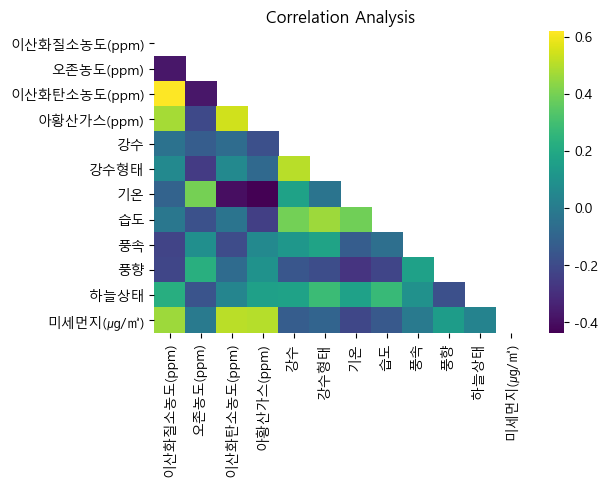

In [85]:
corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,mask=mask,annot=False,lw=0,linecolor='white',cmap='viridis',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

In [60]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),강수,강수형태,기온,습도,풍속,풍향,하늘상태,미세먼지(㎍/㎥)
이산화질소농도(ppm),1.000000,-0.374005,0.619980,0.476417,-0.037973,0.060042,-0.105759,-0.015956,-0.225791,-0.217444,0.226035,0.463371
오존농도(ppm),-0.374005,1.000000,-0.374012,-0.202512,-0.129741,-0.253933,0.400949,-0.175594,0.086710,0.231051,-0.164111,-0.003995
이산화탄소농도(ppm),0.619980,-0.374012,1.000000,0.545162,-0.068880,0.062498,-0.396873,-0.029892,-0.196432,-0.070829,0.044614,0.509089
아황산가스(ppm),0.476417,-0.202512,0.545162,1.000000,-0.180616,-0.078965,-0.437038,-0.241833,0.058718,0.103711,0.160318,0.501445
강수,-0.037973,-0.129741,-0.068880,-0.180616,1.000000,0.506418,0.171904,0.393234,0.124396,-0.152335,0.171535,-0.128697
강수형태,0.060042,-0.253933,0.062498,-0.078965,0.506418,1.000000,-0.029635,0.463643,0.178055,-0.191232,0.284680,-0.101240
기온,-0.105759,0.400949,-0.396873,-0.437038,0.171904,-0.029635,1.000000,0.391761,-0.129978,-0.276457,0.163784,-0.210980
습도,-0.015956,-0.175594,-0.029892,-0.241833,0.393234,0.463643,0.391761,1.000000,-0.056120,-0.218335,0.274057,-0.147495
풍속,-0.225791,0.086710,-0.196432,0.058718,0.124396,0.178055,-0.129978,-0.056120,1.000000,0.164725,0.093815,-0.005214
풍향,-0.217444,0.231051,-0.070829,0.103711,-0.152335,-0.191232,-0.276457,-0.218335,0.164725,1.000000,-0.180914,0.144391


In [61]:
import scipy.stats as stats

df_corr = pd.DataFrame(['이산화질소농도(ppm)', '오존농도(ppm)', '이산화탄소농도(ppm)', '아황산가스(ppm)', '강수',
       '강수형태', '기온', '습도', '풍속', '풍향', '하늘상태'])
df_corr.columns = ['Factor'] 
df_corr['Corr Value'] = pd.Series()
df_corr['P-Value'] = pd.Series()
for i in range(len(df_corr)):
    df_corr['Corr Value'].loc[i]  = round(stats.pearsonr(df['미세먼지(㎍/㎥)'],df[df_corr['Factor'][i]])[0],2)
    df_corr['P-Value'].loc[i] = round(stats.pearsonr(df['미세먼지(㎍/㎥)'],df[df_corr['Factor'][i]])[1],2)
df_corr

,Factor,Corr Value,P-Value
0,이산화질소농도(ppm),0.46,0.00
1,오존농도(ppm),-0.00,0.81
2,이산화탄소농도(ppm),0.51,0.00
3,아황산가스(ppm),0.50,0.00
4,강수,-0.13,0.00
5,강수형태,-0.10,0.00
6,기온,-0.21,0.00
7,습도,-0.15,0.00
8,풍속,-0.01,0.75
9,풍향,0.14,0.00


In [16]:
df1 = df[['측정일시','미세먼지(㎍/㎥)']]
for i in range(len(df1)):
    df1['측정일시'].iloc[i] = df1['측정일시'].iloc[i][0:4]
df1 = df1.groupby('측정일시').mean()
df1

,미세먼지(㎍/㎥)
측정일시,
2011,46.635616
2012,38.912568
2013,42.934247
2014,45.645604
2015,44.347945
2016,47.497636
2017,40.493151
2018,34.828479
2019,37.533708


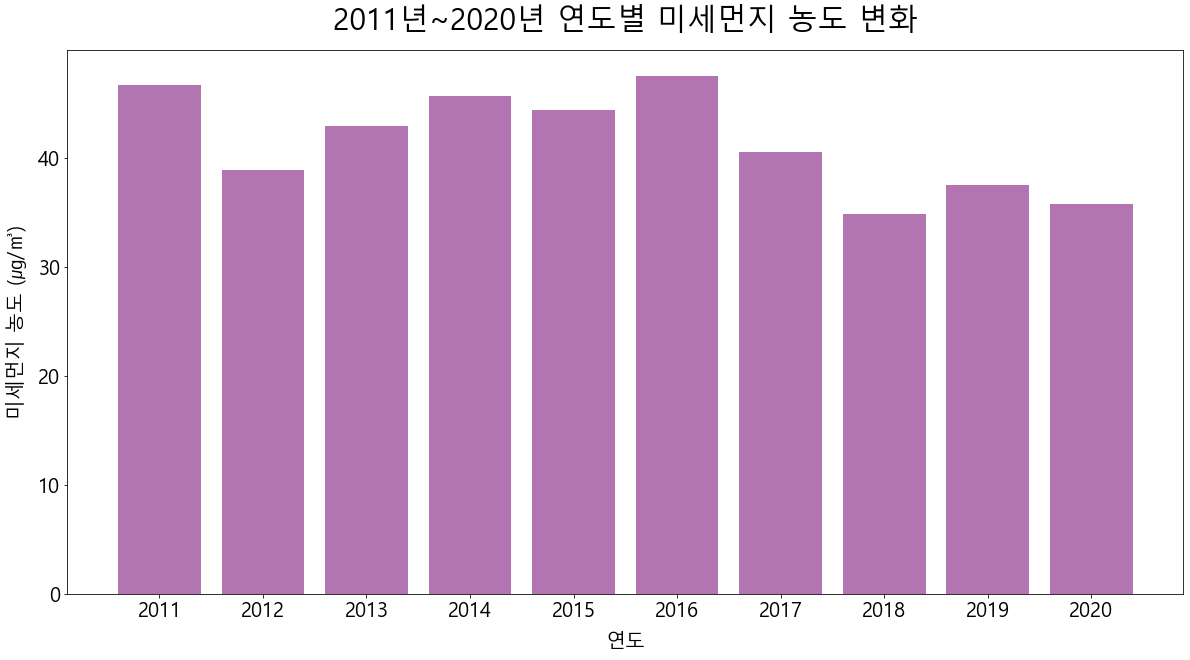

In [30]:
# 그래프 사이즈설정
plt.figure(figsize=(20, 10))  

# create dataset
height = df1['미세먼지(㎍/㎥)']
bars = df1.index
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('2011년~2020년 연도별 미세먼지 농도 변화',fontsize=30, pad=20)
plt.xlabel('연도', fontsize = 20, labelpad=10) ## X축 레이블타이틀
plt.ylabel('미세먼지 농도 (㎍/㎥)', fontsize = 20, labelpad=10) ## Y축 레이블타이틀
 
    
# Create names on the x axis
# 그래프 화면에 출력
plt.xticks(fontsize = 20) # X축 레이블
plt.yticks(fontsize = 20) # Y축 레이블
plt.xticks(x_pos, bars)
 
# Show graph
plt.show()

In [68]:
df2 = df[['측정일시','미세먼지(㎍/㎥)']]
for i in range(len(df2)):
    df2['측정일시'].iloc[i] = df2['측정일시'].iloc[i][5:7]
df2 = df2.groupby('측정일시').mean()
df2.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']

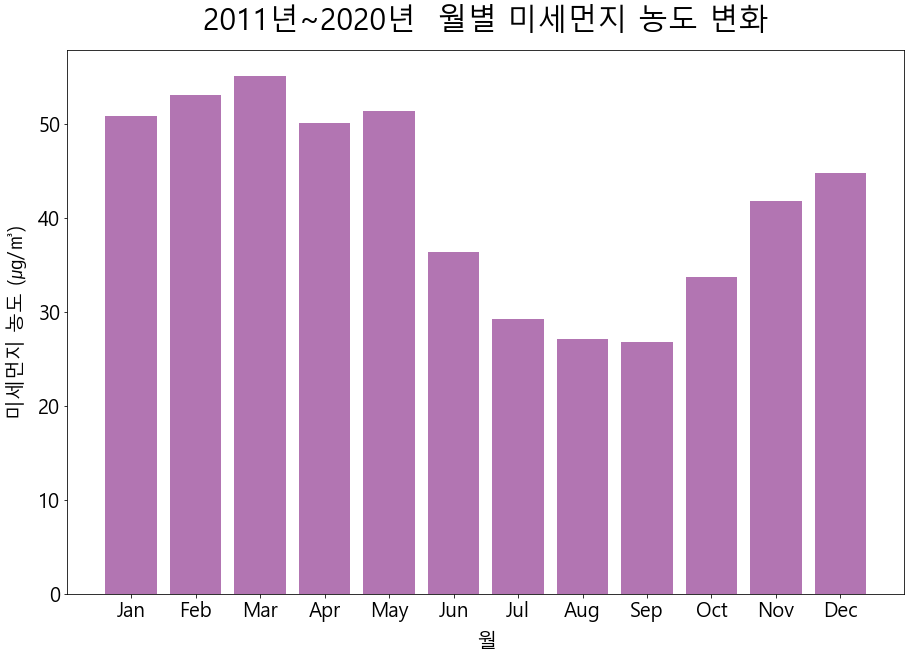

In [69]:
# 그래프 사이즈설정
plt.figure(figsize=(15, 10))  

# create dataset
height = df2['미세먼지(㎍/㎥)']
bars = df2.index
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('2011년~2020년  월별 미세먼지 농도 변화',fontsize=30, pad=20)
plt.xlabel('월', fontsize = 20, labelpad=10) ## X축 레이블타이틀
plt.ylabel('미세먼지 농도 (㎍/㎥)', fontsize = 20, labelpad=10) ## Y축 레이블타이틀
 
    
# Create names on the x axis
# 그래프 화면에 출력
plt.xticks(fontsize = 20) # X축 레이블
plt.yticks(fontsize = 20) # Y축 레이블
plt.xticks(x_pos, bars)
 
# Show graph
plt.show()

In [63]:
df2 = df[['측정일시','미세먼지(㎍/㎥)']]
for i in range(len(df2)):
    df2['측정일시'].iloc[i] = df2['측정일시'].iloc[i][5:7]
df2 = df2.groupby('측정일시').mean()
df2.index = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall','Winter']
df2.reset_index(inplace=True)
df2 = df2.groupby('index').mean()
df2 = df2.reindex(['Spring','Summer','Fall','Winter'])

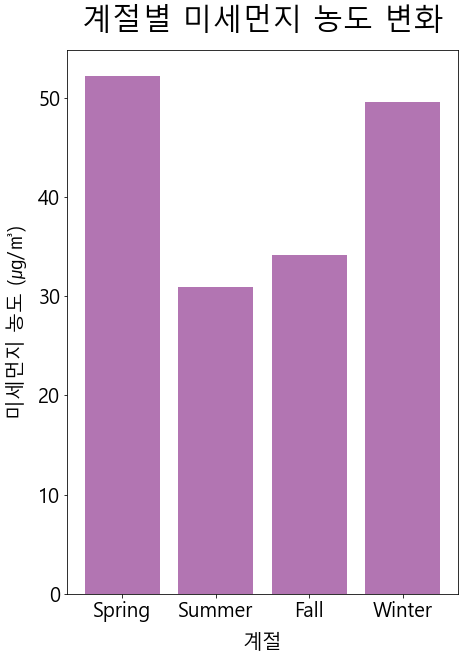

In [66]:
# 그래프 사이즈설정
plt.figure(figsize=(7, 10))  

# create dataset
height = df2['미세먼지(㎍/㎥)']
bars = df2.index
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('계절별 미세먼지 농도 변화',fontsize=30, pad=20)
plt.xlabel('계절', fontsize = 20, labelpad=10) ## X축 레이블타이틀
plt.ylabel('미세먼지 농도 (㎍/㎥)', fontsize = 20, labelpad=10) ## Y축 레이블타이틀
 
    
# Create names on the x axis
# 그래프 화면에 출력
plt.xticks(fontsize = 20) # X축 레이블
plt.yticks(fontsize = 20) # Y축 레이블
plt.xticks(x_pos, bars)
 
# Show graph
plt.show()

## 전날데이터 추가시키기

In [86]:
df = pd.read_csv("df.csv",encoding='utf-8-sig',index_col=0)
df['전날 미세먼지(㎍/㎥)'] = df['미세먼지(㎍/㎥)']
temp = df['미세먼지(㎍/㎥)']
for i in range(len(df)-1):
    df['전날 미세먼지(㎍/㎥)'].iloc[i+1] = temp[i]
    
for i in ['이산화질소농도(ppm)', '오존농도(ppm)', '이산화탄소농도(ppm)', '아황산가스(ppm)',
          '강수','강수형태','기온','풍향','풍속','습도','하늘상태']:
    df['전날'+ i] = df[i]
    temp = df[i]
    for j in range(len(df)-1):
        df['전날'+ i].iloc[j+1] = temp[j]
df = df[['측정일시', '전날이산화질소농도(ppm)', '전날오존농도(ppm)', '전날이산화탄소농도(ppm)', '전날아황산가스(ppm)', '전날습도',
       '전날 미세먼지(㎍/㎥)', '전날강수', '전날강수형태', '전날기온', '전날풍향', '전날풍속','전날하늘상태', '미세먼지(㎍/㎥)', '등급']]
df.drop(labels=0, axis=0,inplace=True)
df

,측정일시,전날이산화질소농도(ppm),전날오존농도(ppm),전날이산화탄소농도(ppm),전날아황산가스(ppm),전날습도,전날 미세먼지(㎍/㎥),전날강수,전날강수형태,전날기온,전날풍향,전날풍속,전날하늘상태,미세먼지(㎍/㎥),등급
1,2011-01-02,0.026,0.009,1.0,0.008,62.750000,57.0,0.000000,0.000000,-6.083333,183.333333,1.687500,1.666667,62.0,보통
2,2011-01-03,0.031,0.011,1.2,0.006,62.000000,62.0,0.000000,0.000000,-5.212500,188.791667,1.800000,1.041667,63.0,보통
3,2011-01-04,0.036,0.005,1.2,0.005,64.583333,63.0,0.000000,0.000000,-4.145833,230.041667,2.400000,2.000000,55.0,보통
4,2011-01-05,0.027,0.010,0.8,0.006,66.583333,55.0,0.000000,0.000000,-2.791667,241.833333,2.520833,2.916667,39.0,보통
5,2011-01-06,0.018,0.017,0.5,0.007,62.375000,39.0,0.000000,0.000000,-5.550000,271.333333,3.600000,1.583333,35.0,보통
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,2020-12-27,0.048,0.009,0.8,0.004,65.750000,60.0,0.000000,0.000000,3.512500,123.791667,1.916667,-1.000000,75.0,보통
3581,2020-12-28,0.044,0.011,0.8,0.004,66.875000,75.0,0.054167,0.041667,6.812500,69.625000,1.541667,-1.000000,73.0,보통
3582,2020-12-29,0.053,0.009,0.9,0.004,70.750000,73.0,0.000000,0.000000,5.770833,219.791667,1.550000,-1.000000,78.0,보통
3583,2020-12-30,0.036,0.012,0.8,0.003,63.875000,78.0,0.008333,0.125000,-4.241667,281.375000,3.812500,-1.000000,38.0,보통


In [87]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,전날이산화질소농도(ppm),전날오존농도(ppm),전날이산화탄소농도(ppm),전날아황산가스(ppm),전날습도,전날 미세먼지(㎍/㎥),전날강수,전날강수형태,전날기온,전날풍향,전날풍속,전날하늘상태,미세먼지(㎍/㎥)
전날이산화질소농도(ppm),1.000000,-0.374167,0.619965,0.476304,-0.015939,0.463318,-0.038075,0.059895,-0.106535,-0.217345,-0.225864,0.225590,0.387966
전날오존농도(ppm),-0.374167,1.000000,-0.374055,-0.202567,-0.175592,-0.004022,-0.129757,-0.253966,0.401052,0.231082,0.086707,-0.164258,-0.032186
전날이산화탄소농도(ppm),0.619965,-0.374055,1.000000,0.545120,-0.029885,0.509055,-0.068919,0.062438,-0.397364,-0.070773,-0.196447,0.044406,0.399092
전날아황산가스(ppm),0.476304,-0.202567,0.545120,1.000000,-0.241839,0.501400,-0.180682,-0.079062,-0.437677,0.103807,0.058711,0.160069,0.409227
전날습도,-0.015939,-0.175592,-0.029885,-0.241839,1.000000,-0.147492,0.393242,0.463664,0.391994,-0.218347,-0.056119,0.274180,-0.122264
전날 미세먼지(㎍/㎥),0.463318,-0.004022,0.509055,0.501400,-0.147492,1.000000,-0.128738,-0.101307,-0.211359,0.144459,-0.005222,0.033816,0.623377
전날강수,-0.038075,-0.129757,-0.068919,-0.180682,0.393242,-0.128738,1.000000,0.506405,0.171857,-0.152309,0.124393,0.171484,-0.184121
전날강수형태,0.059895,-0.253966,0.062438,-0.079062,0.463664,-0.101307,0.506405,1.000000,-0.029892,-0.191188,0.178053,0.284590,-0.166581
전날기온,-0.106535,0.401052,-0.397364,-0.437677,0.391994,-0.211359,0.171857,-0.029892,1.000000,-0.276376,-0.130075,0.163069,-0.232455
전날풍향,-0.217345,0.231082,-0.070773,0.103807,-0.218347,0.144459,-0.152309,-0.191188,-0.276376,1.000000,0.164736,-0.180791,0.154144


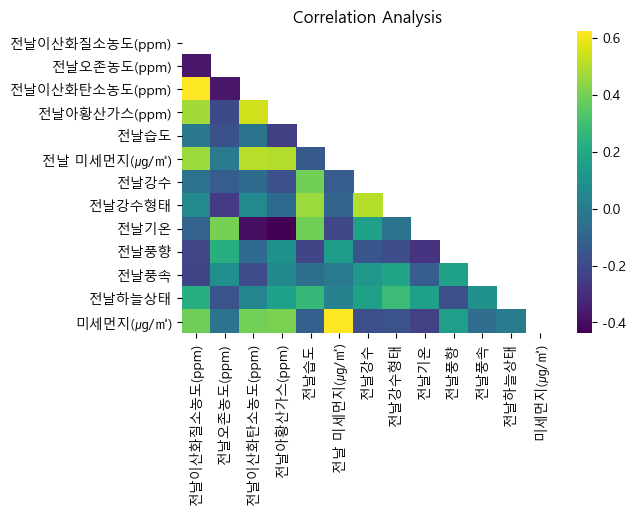

In [88]:
corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,mask=mask,annot=False,lw=0,linecolor='white',cmap='viridis',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

In [8]:
import scipy.stats as stats

df_corr = pd.DataFrame(['전날이산화질소농도(ppm)', '전날오존농도(ppm)', '전날이산화탄소농도(ppm)', '전날아황산가스(ppm)', '전날강수',
       '전날강수형태', '전날기온', '전날습도', '전날풍속', '전날풍향', '전날하늘상태','전날 미세먼지(㎍/㎥)'])
df_corr.columns = ['Factor'] 
df_corr['Correlation Value'] = pd.Series()
df_corr['P-Value'] = pd.Series()
for i in range(len(df_corr)):
    df_corr['Correlation Value'].loc[i]  = round(stats.pearsonr(df['미세먼지(㎍/㎥)'],df[df_corr['Factor'][i]])[0],2)
    df_corr['P-Value'].loc[i] = round(stats.pearsonr(df['미세먼지(㎍/㎥)'],df[df_corr['Factor'][i]])[1],2)
df_corr

,Factor,Correlation Value,P-Value
0,전날이산화질소농도(ppm),0.39,0.00
1,전날오존농도(ppm),-0.03,0.05
2,전날이산화탄소농도(ppm),0.40,0.00
3,전날아황산가스(ppm),0.41,0.00
4,전날강수,-0.18,0.00
5,전날강수형태,-0.17,0.00
6,전날기온,-0.23,0.00
7,전날습도,-0.12,0.00
8,전날풍속,-0.07,0.00
9,전날풍향,0.15,0.00


In [3]:
df = pd.read_csv("df.csv",encoding='utf-8-sig',index_col=0)
df['전날 미세먼지(㎍/㎥)'] = df['미세먼지(㎍/㎥)']
temp = df['미세먼지(㎍/㎥)']
for i in range(len(df)-1):
    df['전날 미세먼지(㎍/㎥)'].iloc[i+1] = temp[i]
    
for i in ['강수','강수형태','기온','풍향','풍속']:
    df['전날'+ i] = df[i]
    temp = df[i]
    for j in range(len(df)-1):
        df['전날'+ i].iloc[j+1] = temp[j]
df = df[['측정일시', '이산화질소농도(ppm)', '이산화탄소농도(ppm)', '아황산가스(ppm)', '전날 미세먼지(㎍/㎥)',
        '습도', '전날강수', '전날강수형태', '전날기온', '전날풍향', '전날풍속', '미세먼지(㎍/㎥)', '등급']]
df.drop(labels=0, axis=0,inplace=True)
df

,측정일시,이산화질소농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),전날 미세먼지(㎍/㎥),습도,전날강수,전날강수형태,전날기온,전날풍향,전날풍속,미세먼지(㎍/㎥),등급
1,2011-01-02,0.031,1.2,0.006,57.0,62.000000,0.000000,0.000000,-6.083333,183.333333,1.687500,62.0,보통
2,2011-01-03,0.036,1.2,0.005,62.0,64.583333,0.000000,0.000000,-5.212500,188.791667,1.800000,63.0,보통
3,2011-01-04,0.027,0.8,0.006,63.0,66.583333,0.000000,0.000000,-4.145833,230.041667,2.400000,55.0,보통
4,2011-01-05,0.018,0.5,0.007,55.0,62.375000,0.000000,0.000000,-2.791667,241.833333,2.520833,39.0,보통
5,2011-01-06,0.014,0.5,0.006,39.0,51.750000,0.000000,0.000000,-5.550000,271.333333,3.600000,35.0,보통
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,2020-12-27,0.044,0.8,0.004,60.0,66.875000,0.000000,0.000000,3.512500,123.791667,1.916667,75.0,보통
3581,2020-12-28,0.053,0.9,0.004,75.0,70.750000,0.054167,0.041667,6.812500,69.625000,1.541667,73.0,보통
3582,2020-12-29,0.036,0.8,0.003,73.0,63.875000,0.000000,0.000000,5.770833,219.791667,1.550000,78.0,보통
3583,2020-12-30,0.010,0.4,0.002,78.0,51.208333,0.008333,0.125000,-4.241667,281.375000,3.812500,38.0,보통


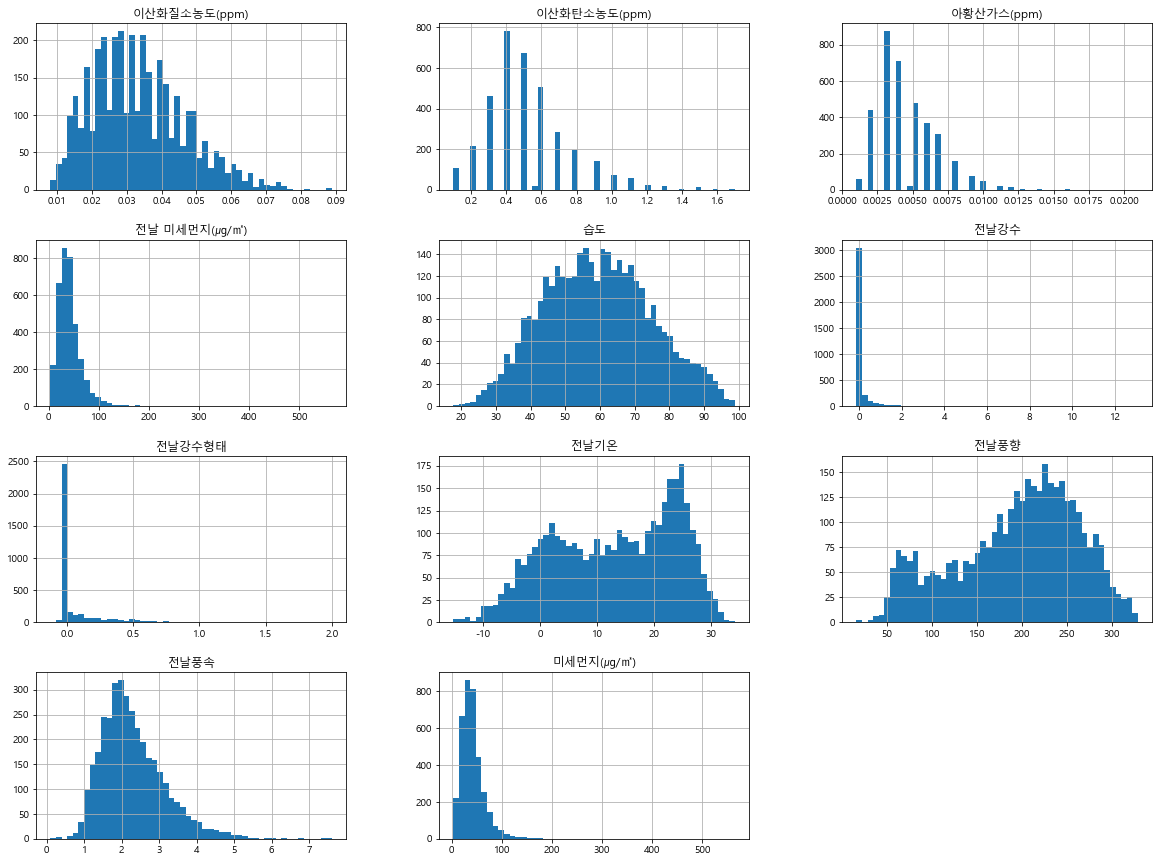

In [4]:
df.hist(bins=50, figsize=(20,15))
plt.show();

In [5]:
train = df.iloc[:,1:-2]
test = df['미세먼지(㎍/㎥)']

# SckitLearn also provide Test/Train set selection modules kindly!
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train, test,test_size=0.2,random_state = 0)

In [6]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(x_train, y_train)
regr.score(x_test, y_test)

0.47092011979261095

In [61]:
max(abs(regr.predict(x_test) - y_test))

256.11

In [62]:
# GRIDSearch 를 위한 SKlearn Upgrade
# ! pip install --upgrade scikit-learn

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {'max_depth': [3, 5, 10, 20, 30, 40],'min_samples_split': [2, 5, 10, 20, 30, 40]}
base_estimator = RandomForestRegressor(random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,factor=2, resource='n_estimators',max_resources=30).fit(x_train, y_train)
sh.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_split=30, n_estimators=16,
                      random_state=0)

In [75]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=30,min_samples_split=30, n_estimators=16, random_state=0)
regr.fit(x_train, y_train)
regr.score(x_test, y_test)

0.4873088511107212

## 이상치 제거를 통해 모델 향상 시키기

In [76]:
import numpy as np
Q1 = np.quantile(df['미세먼지(㎍/㎥)'],0.25)
Q3 = np.quantile(df['미세먼지(㎍/㎥)'],0.75)
IQR = Q3 - Q1
IQR * 3

78.0

In [110]:
df.describe()

,이산화질소농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),전날 미세먼지(㎍/㎥),습도,전날강수,전날강수형태,전날기온,전날풍향,전날풍속,미세먼지(㎍/㎥)
count,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000,3584.000000
mean,0.033363,0.520072,0.004547,41.575716,59.532726,0.151044,0.091971,12.970290,194.810256,2.297299,41.567903
std,0.013373,0.237430,0.002169,25.719873,15.470555,0.591069,0.205058,10.758788,67.912305,0.843674,25.719439
min,0.008000,0.100000,0.001000,3.000000,17.750000,-0.125000,-0.125000,-15.233333,16.250000,0.095833,3.000000
25%,0.023000,0.400000,0.003000,26.000000,47.906250,0.000000,0.000000,3.614583,150.447917,1.708333,26.000000
50%,0.032000,0.500000,0.004000,37.000000,59.312500,0.000000,0.000000,14.175000,206.000000,2.150000,37.000000
75%,0.042000,0.600000,0.006000,52.000000,70.208333,0.008333,0.083333,22.695833,246.000000,2.759375,52.000000
max,0.089000,1.700000,0.021000,566.000000,98.958333,13.083333,2.000000,34.195833,329.291667,7.612500,566.000000


In [115]:
np.std(df['미세먼지(㎍/㎥)']) * 4

102.86340258474503

In [114]:
np.mean(df['미세먼지(㎍/㎥)']) 

41.567903024982556

In [116]:
np.mean(df['미세먼지(㎍/㎥)'])  + np.std(df['미세먼지(㎍/㎥)']) * 4

144.4313056097276

### 표준편차 3 이상인 값을 다 제거시키기에는, 미세먼지 나쁨 등급 이상은 다 제거 됨으로 적절하지 못하다 판단

In [66]:
df.sort_values('미세먼지(㎍/㎥)',ascending=False).head(10)

,측정일시,이산화질소농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),습도,전날 미세먼지(㎍/㎥),전날강수,전날강수형태,전날기온,전날풍향,전날풍속,하늘상태,미세먼지(㎍/㎥),등급
1513,2015-02-23,0.024,0.6,0.005,63.000000,245.0,0.000000,0.000000,1.158333,267.333333,4.116667,1.625000,566.0,아주나쁨
121,2011-05-02,0.039,0.7,0.004,50.333333,180.0,0.000000,0.000000,11.787500,233.958333,3.550000,2.250000,297.0,아주나쁨
77,2011-03-19,0.027,0.2,0.006,44.625000,41.0,0.000000,0.000000,7.754167,214.875000,4.162500,3.500000,283.0,아주나쁨
1512,2015-02-22,0.026,0.5,0.006,68.416667,24.0,0.666667,0.875000,5.737500,108.166667,3.308333,2.541667,245.0,아주나쁨
122,2011-05-03,0.043,0.6,0.006,45.083333,297.0,0.000000,0.000000,15.170833,223.125000,2.454167,1.291667,234.0,아주나쁨
1938,2016-04-23,0.036,0.6,0.003,48.416667,81.0,0.000000,0.000000,12.366667,220.833333,1.320833,3.958333,210.0,아주나쁨
120,2011-05-01,0.023,0.7,0.003,71.875000,41.0,1.375000,0.333333,12.558333,196.125000,3.000000,1.875000,180.0,아주나쁨
78,2011-03-20,0.027,0.2,0.004,66.083333,283.0,0.125000,0.208333,8.637500,261.625000,3.233333,3.375000,179.0,아주나쁨
2928,2019-03-05,0.037,0.9,0.005,57.166667,148.0,0.000000,0.000000,9.545833,236.375000,2.200000,-1.000000,177.0,아주나쁨
1539,2015-03-21,0.057,0.8,0.012,41.125000,102.0,0.000000,0.000000,13.420833,259.958333,2.333333,1.000000,172.0,아주나쁨


In [120]:
df[df['미세먼지(㎍/㎥)']>144].count()

측정일시            24
이산화질소농도(ppm)    24
이산화탄소농도(ppm)    24
아황산가스(ppm)      24
전날 미세먼지(㎍/㎥)    24
습도              24
전날강수            24
전날강수형태          24
전날기온            24
전날풍향            24
전날풍속            24
미세먼지(㎍/㎥)       24
등급              24
dtype: int64

<AxesSubplot:>

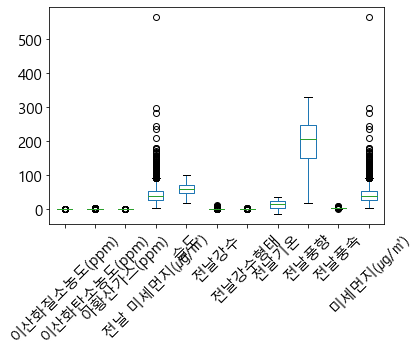

In [122]:
df.boxplot(grid=False, rot=45, fontsize=15)

{'whiskers': [<matplotlib.lines.Line2D at 0x170fc4fd9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x170fc4f2070>,
 'boxes': [<matplotlib.lines.Line2D at 0x170fc4fd670>],
 'medians': [<matplotlib.lines.Line2D at 0x170fc4f2730>],
 'fliers': [<matplotlib.lines.Line2D at 0x170fc4f2a90>],
 'means': []}

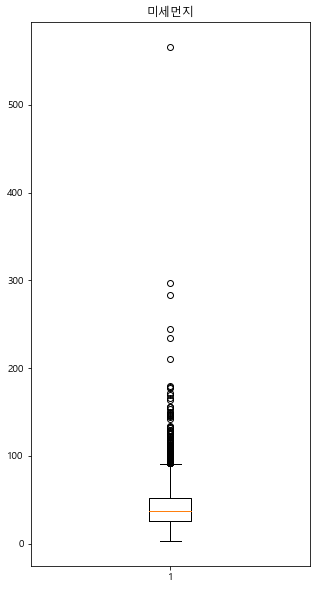

In [129]:
fig1, ax1 = plt.subplots(figsize=(5, 10))
ax1.set_title('미세먼지')
ax1.boxplot(df['미세먼지(㎍/㎥)'])

In [131]:
24/len(df)

0.006696428571428571

### 미세먼지농도 150을 넘는 데이터를 이상치로 규정하고 제거

In [4]:
df.drop(labels=df[df['미세먼지(㎍/㎥)']>150].index, axis=0,inplace=True)

In [8]:
train = df.iloc[:,1:-2]
test = df['미세먼지(㎍/㎥)']

# SckitLearn also provide Test/Train set selection modules kindly!
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train, test,test_size=0.2,random_state = 0)

In [12]:
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

In [60]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

predictions = tree.predict(x_test)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
print('RMSE = ', RMSE)

errors = abs(predictions - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy = ', accuracy)

print('r2 = ', tree.score(x_test, y_test))

RMSE =  18.654777302914695
Accuracy =  63.94795242757117
r2 =  0.22357785439191324


In [61]:
#fit random forest
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

predictions = forest.predict(x_test)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
print('RMSE = ', RMSE)

errors = abs(predictions - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy = ', accuracy)

print('r2 = ', forest.score(x_test, y_test))

RMSE =  12.99754461664818
Accuracy =  72.81674534326528
r2 =  0.6230876132994809


In [62]:
#fit regression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

predictions = lin_reg.predict(x_test)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
print('RMSE = ', RMSE)

errors = abs(predictions - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy = ', accuracy)

print('r2 = ', lin_reg.score(x_test, y_test))

RMSE =  13.360326174161582
Accuracy =  73.05504528114685
r2 =  0.6017535636212532


In [96]:
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree)]
scoring = ['neg_mean_squared_error', 'r2']

results= []
metric= []

for name, model in models:
    for i in scoring:
        scores = cross_validate(model, x_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

In [112]:
#THIS IS FOR Linear regression
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= np.sqrt(results[0]['test_score'].std())
LR_r2_mean = results[1]['test_score'].mean()
LR_r2_std = results[1]['test_score'].std()

#THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[2]['test_score'].mean())
RF_RMSE_std= np.sqrt(results[2]['test_score'].std())
RF_r2_mean = results[3]['test_score'].mean()
RF_r2_std = results[3]['test_score'].std()

#THIS IS FOR DT
DT_RMSE_mean = np.sqrt(-results[4]['test_score'].mean())
DT_RMSE_std= np.sqrt(results[4]['test_score'].std())
DT_r2_mean = results[5]['test_score'].mean()
DT_r2_std = results[5]['test_score'].std()

In [113]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, DT_r2_mean],
    'r2_std'      : [LR_r2_std, RF_r2_std, DT_r2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std','r2_mean', 'r2_std'])

modelDF

,Model,RMSE_mean,RMSE_std,r2_mean,r2_std
0,Linear Regression,13.378911,5.441453,0.620038,0.082571
1,Random Forest,12.670783,4.144031,0.660505,0.037137
2,Decision Trees,18.523129,7.800800,0.272762,0.113935


In [99]:
np.sqrt(-results[0]['test_score'])

array([13.60675176, 15.70625632, 12.73437225, 12.79222326, 13.37034114,
       12.35201314, 14.26895962, 13.82104183, 13.1815248 , 11.51529064])

In [100]:
np.sqrt(-results[2]['test_score'])

array([13.47713135, 12.33076306, 12.67456753, 12.60166097, 12.961912  ,
       12.29444287, 13.79458545, 13.09521579, 11.85615027, 11.43906215])

In [101]:
np.sqrt(-results[4]['test_score'])

array([19.51013663, 17.85838854, 18.36184475, 19.38495259, 19.21232699,
       15.99427292, 17.80075665, 22.03678514, 17.41606438, 16.9654179 ])

In [102]:
cv_rmse = pd.DataFrame([np.sqrt(-results[0]['test_score']),np.sqrt(-results[2]['test_score']),np.sqrt(-results[4]['test_score'])]).transpose()
cv_rmse.columns = ['Linear Regression','Random Forest','Decision Tree']
cv_r2 = pd.DataFrame([np.sqrt(results[1]['test_score']),np.sqrt(results[3]['test_score']),np.sqrt(results[5]['test_score'])]).transpose()
cv_r2.columns = ['Linear Regression','Random Forest','Decision Tree']

<AxesSubplot:>

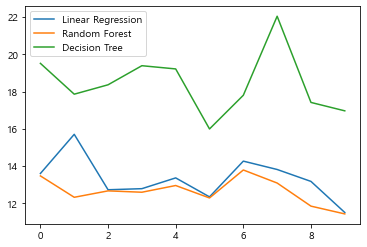

In [103]:
cv_rmse.plot()

In [104]:
cv_r2

,Linear Regression,Random Forest,Decision Tree
0,0.810165,0.808075,0.523321
1,0.642566,0.792601,0.502790
2,0.818169,0.816226,0.588956
3,0.798016,0.806270,0.431641
4,0.840525,0.853001,0.654066
5,0.827490,0.839045,0.644388
6,0.756392,0.773191,0.542598
7,0.771555,0.795288,0.126409
8,0.759535,0.805578,0.453974
9,0.830269,0.834675,0.555205


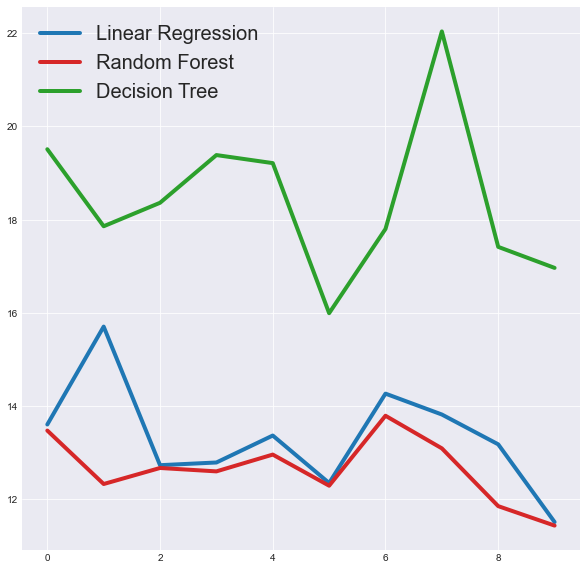

In [110]:
# 그래프 사이즈설정
plt.figure(figsize=(10, 10))  

# multiple line plots
plt.plot( cv_rmse.index, 'Linear Regression', data=cv_rmse, color='tab:blue', linewidth=4)
plt.plot( cv_rmse.index, 'Random Forest', data=cv_rmse,  color='tab:red', linewidth=4)
plt.plot( cv_rmse.index, 'Decision Tree', data=cv_rmse,  color='tab:green', linewidth=4)
# show legend
plt.legend(loc=2, prop={'size': 20})

# show graph
plt.show()

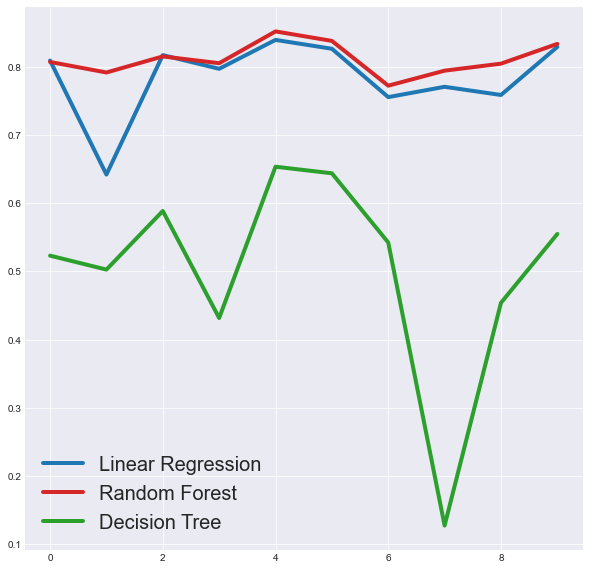

In [111]:
# 그래프 사이즈설정
plt.figure(figsize=(10, 10))  

# multiple line plots
plt.plot( cv_r2.index, 'Linear Regression', data=cv_r2, color='tab:blue', linewidth=4)
plt.plot( cv_r2.index, 'Random Forest', data=cv_r2,  color='tab:red', linewidth=4)
plt.plot( cv_r2.index, 'Decision Tree', data=cv_r2,  color='tab:green', linewidth=4)
# show legend
plt.legend(loc=3, prop={'size': 20})

# show graph
plt.show()

In [11]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(x_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 13.18
RMSE of random forest = 4.77
RMSE of decision tree = 0.00


In [12]:
for i, model in models:
    # Make predictions on train data
    predictions = model.predict(x_train)
    # Performance metrics
    errors = abs(predictions - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_train))
    # Calculate and display accuracy
    accuracy = 100 - mape    
    #print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')

Accuracy of lin_reg= 73.12 %
Accuracy of random forest= 90.30 %
Accuracy of decision tree= 100.00 %


In [13]:
tree.score(x_test, y_test)

0.25241805482413693

In [14]:
forest.score(x_test, y_test)

0.6239678945549658

In [15]:
lin_reg.score(x_test, y_test)

0.6017535636212532

In [16]:
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

#for each model I want to test three different scoring metrics. Therefore, results[0] will be lin_reg x MSE, 
# results[1] lin_reg x MSE and so on until results [8], where we stored dt x r2

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, x_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

In [17]:
#THIS IS FOR Linear regression
#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

#THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

#THIS IS FOR DT
DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()

In [18]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean, DT_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std, DT_MAE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, DT_r2_mean],
    'r2_std'      : [LR_r2_std, RF_r2_std, DT_r2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

modelDF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,r2_mean,r2_std
1,Random Forest,12.734437,17.963741,9.013730,0.341048,0.662210,0.032779
0,Linear Regression,13.378911,29.609414,9.449126,0.461874,0.620038,0.082571
2,Decision Trees,18.180263,46.635567,12.975088,0.811060,0.273934,0.121377


n_estimators = n of trees
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is smmplit
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)

In [152]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 50], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]


grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 50]}],
             scoring='neg_mean_squared_error')

In [153]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

12.926201874226892 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
12.500262623798736 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}
13.040352047791476 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
12.799619687452992 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 50}
13.1086569838215 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
12.607030229405009 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 50}
13.280153539094387 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
12.713519435466015 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 50}
13.082415512700218 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
12.550560364609375 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 50}
13.045141145716759 {'bootstrap': True, 'max_

In [154]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(max_depth=10, max_features=5, n_estimators=50)

In [167]:
#fit random forest
forest = RandomForestRegressor(n_estimators=500)
forest.fit(x_train, y_train)

predictions = forest.predict(x_test)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
print('RMSE = ', RMSE)

errors = abs(predictions - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy = ', accuracy)

print('r2 = ', forest.score(x_test, y_test))

RMSE =  12.899042816540053
Accuracy =  73.06709866017673
r2 =  0.6287788216039422


In [155]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(x_test)
errors = abs(grid_best - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 73.31 %


In [156]:
#RMSE
grid_mse = mean_squared_error(y_test, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 12.65


In [137]:
4.68**2

21.902399999999997

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [26]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [27]:
#now let's how the RMSE changes for each parameter configuration
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

18.462315862944916 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
18.301916774162688 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
12.514732914660046 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
12.985264419983752 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
17.919746318476165 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
12.374846370458668 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
12.368949173954961 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
12.665516378418546 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
17.893416342665432 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
12.399837989286421 {'n_estimators': 110, 'min_samp

In [28]:
# best random model 
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155, n_jobs=-1)

In [29]:
# best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 23}

In [30]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155, n_jobs=-1)

In [31]:
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(x_train)
errors = abs(random_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 87.98 %


In [32]:
#this is the RMSE
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 5.93


In [34]:
# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(x_train.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

   importance       feature
0    0.292317  전날 미세먼지(㎍/㎥)
1    0.169070  이산화탄소농도(ppm)
2    0.123927    아황산가스(ppm)
3    0.123815  이산화질소농도(ppm)
4    0.076535          전날풍향
5    0.062142          전날기온
6    0.051438            습도
7    0.046738          전날풍속
8    0.030636          전날강수
9    0.023381        전날강수형태


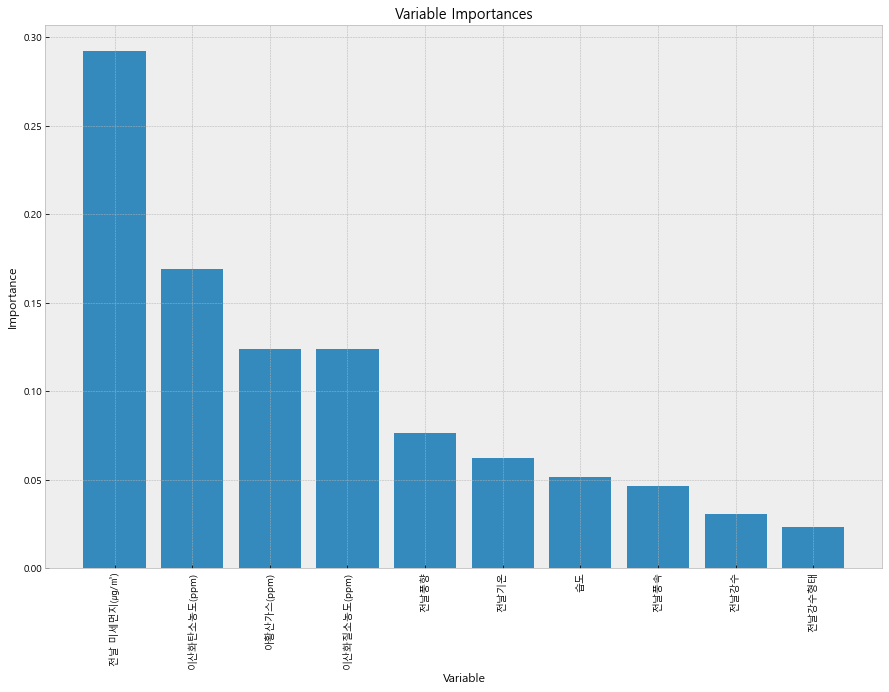

In [35]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {'max_depth': [3, 5, 10, 20, 30, 40],'min_samples_split': [2, 5, 10, 20, 30, 40]}
base_estimator = RandomForestRegressor(random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,factor=2, resource='n_estimators',max_resources=30).fit(x_train, y_train)
sh.best_estimator_

RandomForestRegressor(max_depth=40, min_samples_split=30, n_estimators=16,
                      random_state=0)

In [81]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=40, min_samples_split=30, n_estimators=16, random_state=0)
regr.fit(x_train, y_train)
regr.score(x_test, y_test)

0.6345626850210623

In [72]:
max(abs(regr.predict(x_test) - y_test))

67.64353385403027

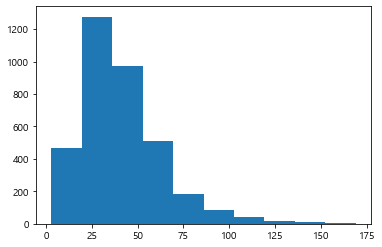

In [73]:
plt.hist(df['미세먼지(㎍/㎥)'])
plt.show()

In [75]:
train = df.iloc[:,1:-2]
test = df['미세먼지(㎍/㎥)']

# SckitLearn also provide Test/Train set selection modules kindly!
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train, test,test_size=0.2,random_state = 0)

In [76]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(x_train, y_train)
regr.score(x_test, y_test)

0.6439073161683859

In [ ]:
## 아이디어 : 등급 분류 후 -> 예측 

In [80]:
train = df.iloc[:,1:-2]
test = df['등급']

# SckitLearn also provide Test/Train set selection modules kindly!
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train, test,test_size=0.2,random_state = 0)

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.800557880055788

Confusion matrix, without normalization
[[ 13  27   1   0]
 [  2 359   0  46]
 [  2   0   0   1]
 [  0  64   0 202]]
Normalized confusion matrix
[[0.31707317 0.65853659 0.02439024 0.        ]
 [0.004914   0.88206388 0.         0.11302211]
 [0.66666667 0.         0.         0.33333333]
 [0.         0.2406015  0.         0.7593985 ]]


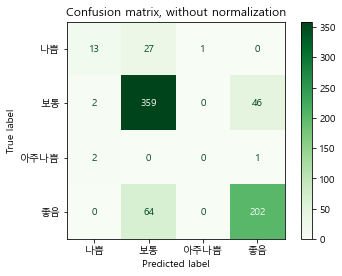

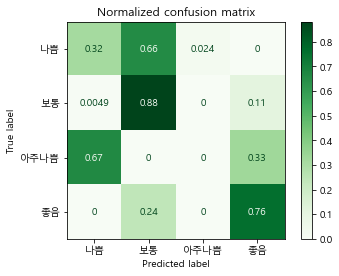

In [82]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [89]:
for i in range(len(df)):
    if df['미세먼지(㎍/㎥)'].iloc[i] < 70:
        df['등급'].iloc[i] = '실외가능'
    else:
        df['등급'].iloc[i] = '실내추천'


In [101]:
train = df.iloc[:,1:-2]
test = df['등급']

# SckitLearn also provide Test/Train set selection modules kindly!
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train, test,test_size=0.2,random_state = 0)

In [104]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=40, random_state=0)
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.9107391910739191

Confusion matrix, without normalization
[[ 31  55]
 [  9 622]]
Normalized confusion matrix
[[0.36046512 0.63953488]
 [0.01426307 0.98573693]]


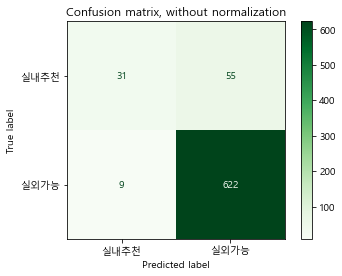

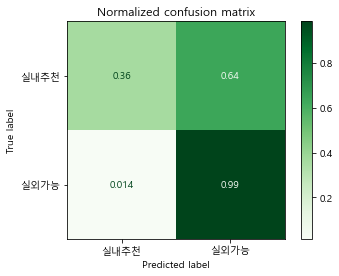

In [105]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# 시계열분석


In [216]:
df_ts = pd.read_csv(path + '/미세먼지2020.csv')

In [193]:
df_ts.head(5)

,지점,지점명,일시,1시간평균 미세먼지농도(㎍/㎥)
0,108,서울,2020-01-01 00:00,27
1,108,서울,2020-01-01 01:00,20
2,108,서울,2020-01-01 02:00,21
3,108,서울,2020-01-01 03:00,31
4,108,서울,2020-01-01 04:00,30


In [194]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7610 entries, 0 to 7609
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   지점                 7610 non-null   int64 
 1   지점명                7610 non-null   object
 2   일시                 7610 non-null   object
 3   1시간평균 미세먼지농도(㎍/㎥)  7610 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 237.9+ KB


In [195]:
df_ts = pd.read_csv(path + '/미세먼지2020.csv')
df_ts = df_ts.iloc[:,2:]
df_ts['일시'] = pd.to_datetime(df_ts['일시'])
df_ts.set_index('일시',inplace=True)
df_ts.index = pd.DatetimeIndex(df_ts.index.values,freq=df_ts.index.inferred_freq)

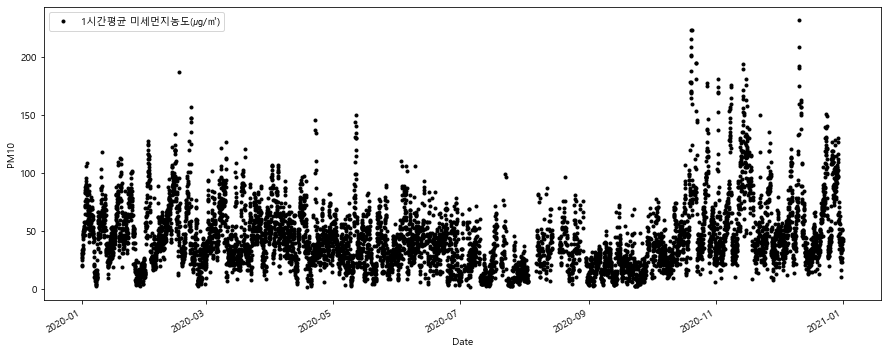

In [196]:
#Plot PM10 values in 2016
df_ts.plot(figsize=(15, 6),style='k.')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.show()

In [217]:
df_ts.columns

Index(['지점', '지점명', '일시', '1시간평균 미세먼지농도(㎍/㎥)'], dtype='object')

In [203]:
import statsmodels.api as sm
#Selection of optimal parameters to train the model 
valor1=(1,1,1)
valor2=(1,1,1,12)

mod = sm.tsa.statespace.SARIMAX(df_ts,order=valor1,seasonal_order=valor2,enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit(disp=0)

#Prediction of 2020 data
pred_ci = results.predict()


C:\Users\hanbi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\hanbi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


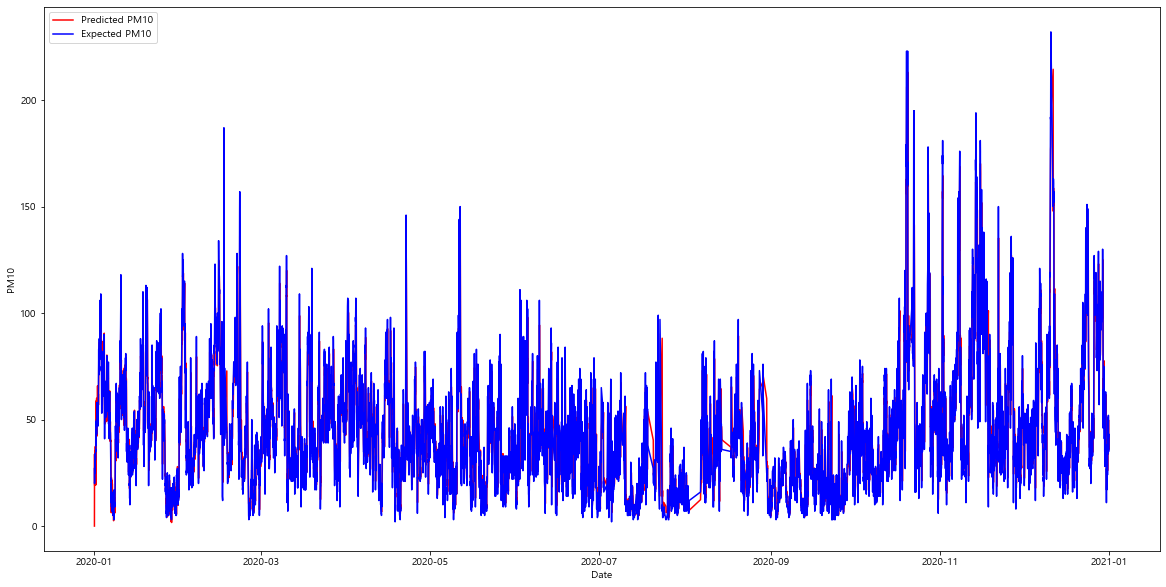

In [206]:

plt.rcParams['figure.figsize'] = (20, 10)
plt.xlabel('Date')
plt.ylabel('PM10')
plt.plot(pred_ci,'r',label='Predicted PM10')
plt.plot(df_ts,'b',label='Expected PM10')
plt.legend(loc='best')
plt.show()